<a href="https://colab.research.google.com/github/RithvikRS/Malicious_URL/blob/main/ISM_Malicious_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
#importing Dataset from github
! git clone https://github.com/RithvikRS/Malicious_URL.git
data_dir = "Malicious_URL/Malicious URLs.csv"
url_df = pd.read_csv(data_dir)
test_url = url_df['URLs'][4]

fatal: destination path 'Malicious_URL' already exists and is not an empty directory.


In [3]:
#Data
url_df.head(5)

,URLs,Class
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good


In [4]:
#Splitting into Train/Test data
test_percentage = .2
train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)
labels = train_df['Class']
test_labels = test_df['Class']

In [5]:
#Counting the data for each split
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

- Counting Splits -
Training Samples: 336371
Testing Samples: 84093


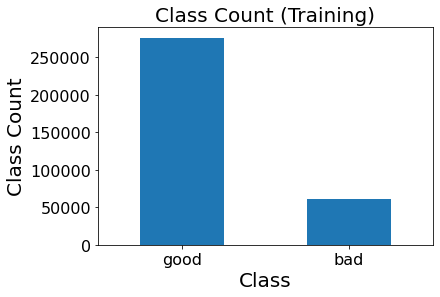

In [6]:
# Graph counts of training set
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)
plt.show()

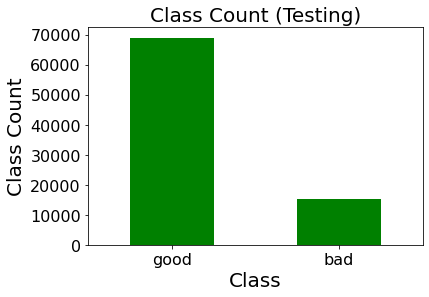

In [7]:
# Graph counts of test set
count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)
plt.show()

In [8]:
#Creating a function which will return features(words) from the URL
def tokenizer(url):
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
  
  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
          
      tokens += dot_split
  return tokens

In [9]:
#Verifying the function
print(tokenizer("https://en.wikipedia.org/wiki/Information_security_management"))

['https:', '', 'en.wikipedia.org', 'wiki', 'Information_security_management', 'en', 'wikipedia', 'org']


In [10]:
#Vectorizing the training dataset

#Count Vectorizer
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])

#TF-IDF
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])

In [13]:
#Verfying the vectorizer

#CountVectorizer shape
print(count_X.shape)

#TF-IDF shape
print(tfidf_X.shape)

(336371, 575564)
(336371, 575564)


In [14]:
#Vectorizing the testing dataset

#Count Vectorizer
test_count_X = cVec.fit_transform(test_df['URLs'])

#TF-IDF
test_tfidf_X = tVec.fit_transform(test_df['URLs'])

In [15]:
#Verfying the vectorizer

#CountVectorizer shape
print(test_count_X.shape)

#TF-IDF shape
print(test_tfidf_X.shape)

(84093, 188527)
(84093, 188527)
